###Import libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###Read dataset

In [90]:
df = pd.read_csv('/content/Obesity.csv')

In [91]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


###Check for missing values

In [92]:
df.isna().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

###Check numerical and categorical columns

In [93]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [94]:
#To print the numerical columns of the dataset
print("Numerical Columns:",numerical_columns)

Numerical Columns: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [95]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


###Imputation using median and mode

In [96]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [97]:
df['Height'] = df['Height'].fillna(df['Height'].median())

In [98]:
df['family_history_with_overweight'] = df['family_history_with_overweight'].fillna(df['family_history_with_overweight'].mode()[0])

In [99]:
df['CAEC'] = df['CAEC'].fillna(df['CAEC'].mode()[0])

In [100]:
df['SCC'] = df['SCC'].fillna(df['SCC'].mode()[0])

In [101]:
df['MTRANS'] = df['MTRANS'].fillna(df['MTRANS'].mode()[0])

###Check if missing value is still present

In [102]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [103]:
df.corr()

<ipython-input-103-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.039322,0.155285,0.024224,-0.053689,-0.031157,-0.131068,-0.263556
Height,-0.039322,1.000000,0.459878,-0.038148,0.244603,0.213295,0.296574,0.051254
Weight,0.155285,0.459878,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.024224,-0.038148,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.053689,0.244603,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.031157,0.213295,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.131068,0.296574,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.263556,0.051254,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


<ipython-input-104-849b47a12e05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


Text(0.5, 1.0, 'Correlation Heatmap')

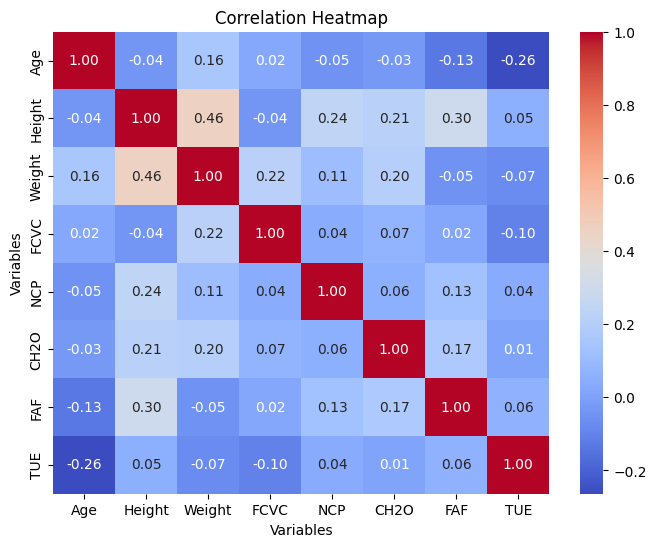

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Set labels and title
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Correlation Heatmap')

###Use Label encoder for categorical variables

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
encoder = LabelEncoder()

In [107]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [108]:
FAVC_dummies = pd.get_dummies(df['FAVC'], prefix='FAVC')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, FAVC_dummies], axis=1)

# Drop the original 'City' column if needed
df_encoded.drop('FAVC', axis=1, inplace=True)

print(data_encoded)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [109]:
df_encoded.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,FAVC_no,FAVC_yes
0,Female,21.0,1.62,64.0,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1,0
1,Female,21.0,1.52,56.0,yes,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,0
2,Male,23.0,1.80,77.0,yes,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1,0
3,Male,27.0,1.80,87.0,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,1,0
4,Male,22.0,1.78,89.8,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1,0


In [110]:
label_encoder = LabelEncoder()

In [111]:
df['NObeyesdad_encoded'] = label_encoder.fit_transform(df['NObeyesdad'])

In [112]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_encoded
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,5
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,6


In [113]:
df['CAEC_encoded'] = label_encoder.fit_transform(df['CAEC'])

In [114]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_encoded,CAEC_encoded
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1,2
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,2
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1,2
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,5,2
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,6,2


In [115]:
df['CALC_encoded'] = label_encoder.fit_transform(df['CALC'])

In [116]:
df['MTRANS_encoded'] = label_encoder.fit_transform(df['MTRANS'])

In [117]:
df['SMOKE_encoded'] = label_encoder.fit_transform(df['SMOKE'])

In [118]:
df['family_history_with_overweight_encoded'] = label_encoder.fit_transform(df['family_history_with_overweight'])

In [119]:
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

In [120]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,CALC,MTRANS,NObeyesdad,NObeyesdad_encoded,CAEC_encoded,CALC_encoded,MTRANS_encoded,SMOKE_encoded,family_history_with_overweight_encoded,Gender_encoded
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,no,Public_Transportation,Normal_Weight,1,2,3,3,0,1,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,Sometimes,Public_Transportation,Normal_Weight,1,2,2,3,1,1,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,Frequently,Public_Transportation,Normal_Weight,1,2,1,3,0,1,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,Frequently,Walking,Overweight_Level_I,5,2,1,4,0,0,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,Sometimes,Public_Transportation,Overweight_Level_II,6,2,2,3,0,0,1


###Find correlation between feature and target

In [121]:
df.corr()

<ipython-input-121-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad_encoded,CAEC_encoded,CALC_encoded,MTRANS_encoded,SMOKE_encoded,family_history_with_overweight_encoded,Gender_encoded
Age,1.000000,-0.039322,0.155285,0.024224,-0.053689,-0.031157,-0.131068,-0.263556,0.197952,0.056092,-0.055512,-0.527125,0.075774,0.144507,0.032989
Height,-0.039322,1.000000,0.459878,-0.038148,0.244603,0.213295,0.296574,0.051254,0.035753,0.048294,-0.128980,-0.074758,0.055149,0.244220,0.616888
Weight,0.155285,0.459878,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561,0.387643,0.287923,-0.206677,0.003125,0.025746,0.495331,0.159603
FCVC,0.024224,-0.038148,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135,0.018522,-0.054789,-0.060781,0.062684,0.014320,0.038524,-0.274224
NCP,-0.053689,0.244603,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326,-0.092616,-0.095407,-0.071747,-0.050780,0.007811,0.069347,0.065931
CH2O,-0.031157,0.213295,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965,0.108868,0.143655,-0.091386,0.042245,-0.031995,0.147703,0.109454
FAF,-0.131068,0.296574,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562,-0.129564,-0.028984,0.086799,0.003728,0.011216,-0.055372,0.191817
TUE,-0.263556,0.051254,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000,-0.069448,-0.047008,0.045864,0.176482,0.017613,0.022352,0.018335
NObeyesdad_encoded,0.197952,0.035753,0.387643,0.018522,-0.092616,0.108868,-0.129564,-0.069448,1.000000,0.328004,-0.134632,-0.048233,-0.023256,0.311764,0.022951
CAEC_encoded,0.056092,0.048294,0.287923,-0.054789,-0.095407,0.143655,-0.028984,-0.047008,0.328004,1.000000,-0.045676,-0.050581,-0.055402,0.173869,0.090287


In [122]:
df['CAEC'].value_counts()

Sometimes     1767
Frequently     241
Always          53
no              50
Name: CAEC, dtype: int64

In [123]:
df['NCP'].value_counts()

3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: NCP, Length: 635, dtype: int64

###Choose Random Forest Regressor for high accuracy

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
model = RandomForestRegressor()

In [126]:
df.head(100)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,CALC,MTRANS,NObeyesdad,NObeyesdad_encoded,CAEC_encoded,CALC_encoded,MTRANS_encoded,SMOKE_encoded,family_history_with_overweight_encoded,Gender_encoded
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,no,Public_Transportation,Normal_Weight,1,2,3,3,0,1,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,Sometimes,Public_Transportation,Normal_Weight,1,2,2,3,1,1,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,Frequently,Public_Transportation,Normal_Weight,1,2,1,3,0,1,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,Frequently,Walking,Overweight_Level_I,5,2,1,4,0,0,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,Sometimes,Public_Transportation,Overweight_Level_II,6,2,2,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,26.0,1.70,70.0,yes,no,3.0,1.0,Frequently,no,...,Frequently,Public_Transportation,Normal_Weight,1,1,1,3,0,1,1
96,Female,23.0,1.66,60.0,yes,no,2.0,3.0,Sometimes,no,...,Sometimes,Public_Transportation,Normal_Weight,1,2,2,3,0,1,0
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,...,Sometimes,Public_Transportation,Insufficient_Weight,0,1,2,3,0,0,0
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,...,Sometimes,Public_Transportation,Insufficient_Weight,0,1,2,3,0,0,0


In [127]:
X_1 = df.drop('family_history_with_overweight_encoded', axis=1)  # Features (all columns except the target variable)
y = df['family_history_with_overweight_encoded']

In [128]:
X_1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_encoded,CAEC_encoded,CALC_encoded,MTRANS_encoded,SMOKE_encoded,Gender_encoded
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,1.0,no,Public_Transportation,Normal_Weight,1,2,3,3,0,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,0.0,Sometimes,Public_Transportation,Normal_Weight,1,2,2,3,1,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,1.0,Frequently,Public_Transportation,Normal_Weight,1,2,1,3,0,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,0.0,Frequently,Walking,Overweight_Level_I,5,2,1,4,0,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,0.0,Sometimes,Public_Transportation,Overweight_Level_II,6,2,2,3,0,1


In [129]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,CALC,MTRANS,NObeyesdad,NObeyesdad_encoded,CAEC_encoded,CALC_encoded,MTRANS_encoded,SMOKE_encoded,family_history_with_overweight_encoded,Gender_encoded
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,no,Public_Transportation,Normal_Weight,1,2,3,3,0,1,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,Sometimes,Public_Transportation,Normal_Weight,1,2,2,3,1,1,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,Frequently,Public_Transportation,Normal_Weight,1,2,1,3,0,1,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,Frequently,Walking,Overweight_Level_I,5,2,1,4,0,0,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,Sometimes,Public_Transportation,Overweight_Level_II,6,2,2,3,0,0,1


### Chose only highly correlated feature variables

In [130]:
x = df[['Weight', 'Age', 'CAEC_encoded','CALC_encoded','family_history_with_overweight_encoded']]

In [131]:
y = df['NObeyesdad_encoded']

In [132]:
x = np.array(x)

In [133]:
y = np.array(y)

In [134]:
x.shape

(2111, 5)

In [135]:
y.shape

(2111,)

###Split data into Train and Test

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [138]:
model.fit(x_train,y_train)

RandomForestRegressor()

###Predict model

In [139]:
y_pred = model.predict(x_test)

In [140]:
y_pred

array([0.33      , 4.        , 0.458     , 0.        , 4.27      ,
       0.02641667, 3.        , 4.72      , 3.55      , 0.02      ,
       2.03      , 4.        , 3.        , 3.        , 4.        ,
       2.88      , 3.48      , 3.        , 2.16      , 5.92      ,
       2.11      , 4.44      , 3.84      , 2.        , 0.73      ,
       5.5       , 5.99      , 3.98      , 3.94      , 0.09      ,
       3.98      , 4.37      , 6.        , 0.2       , 0.03      ,
       3.97      , 2.        , 1.57      , 0.45366667, 1.02      ,
       0.47      , 3.01      , 2.92      , 3.08      , 5.35      ,
       0.01      , 3.        , 0.98      , 2.48      , 3.12      ,
       2.52      , 0.83      , 2.27      , 5.        , 0.04369048,
       3.97      , 3.        , 3.07      , 5.41      , 2.46      ,
       1.28      , 4.        , 5.04      , 0.07      , 2.73      ,
       4.26      , 1.04      , 4.        , 0.32666667, 0.03      ,
       5.12      , 5.88      , 0.        , 0.05      , 4.85   

In [141]:
from sklearn.metrics import mean_squared_error

In [142]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.9710483930695338
